In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
train=pd.read_csv(r'C:\Users\acer\Desktop\Bigdatasales\train.csv')
test=pd.read_csv(r'C:\Users\acer\Desktop\Bigdatasales\test.csv')

In [3]:
train.shape


(550068, 12)

In [4]:
test.shape

(233599, 11)

In [5]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
len(train['User_ID'].unique())

5891

In [8]:
train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
train['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [10]:
train['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [11]:
train['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [12]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [14]:
train['Product_Category_2'] = train['Product_Category_2'].fillna(0)
train['Product_Category_3'] = train['Product_Category_3'].fillna(0)

In [15]:
test['Product_Category_2'] = test['Product_Category_2'].fillna(0)
test['Product_Category_3'] = test['Product_Category_3'].fillna(0)

In [16]:
print(train.isnull().sum())
print(test.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64


In [17]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
train['Age'] = train['Age'].apply(map_age)

In [18]:
test['Age'] = test['Age'].apply(map_age)

In [19]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].map({'0': 0,'1': 1,'2': 2,'3': 3,'4+': 4})
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].map({'0': 0,'1': 1,'2': 2,'3': 3,'4+': 4})

In [20]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,6,16,C,4,0,8,0.0,0.0,7969


In [21]:
cat_col = ['Gender', 'City_Category']
num_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 
           'Product_Category_2', 'Product_Category_3']

In [22]:
encoder = LabelEncoder()

for col in cat_col:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])

In [23]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969


In [24]:
scaler = StandardScaler()

for col in num_col:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to f

In [25]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,-1.844248,0.294864,0,0.109801,0,-0.610809,-1.083654,-0.614641,8370
1,1000001,P00248942,0,-1.844248,0.294864,0,0.109801,0,-1.118912,-0.118323,1.625106,15200
2,1000001,P00087842,0,-1.844248,0.294864,0,0.109801,0,1.675656,-1.083654,-0.614641,1422
3,1000001,P00085442,0,-1.844248,0.294864,0,0.109801,0,1.675656,1.168785,-0.614641,1057
4,1000002,P00285442,1,2.588277,1.214734,2,1.660861,0,0.659449,-1.083654,-0.614641,7969


In [26]:
train['User_ID'] = train['User_ID'] - 1000000
test['User_ID'] = test['User_ID'] - 1000000

enc = LabelEncoder()
train['User_ID'] = enc.fit_transform(train['User_ID'])
test['User_ID'] = enc.transform(test['User_ID'])

In [27]:
train['Product_ID'] = train['Product_ID'].str.replace('P00', '')
test['Product_ID'] = test['Product_ID'].str.replace('P00', '')

scaler = StandardScaler()
train['Product_ID'] = scaler.fit_transform(train['Product_ID'].values.reshape(-1, 1))
test['Product_ID'] = scaler.transform(test['Product_ID'].values.reshape(-1, 1))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-1.028774,0,-1.844248,0.294864,0,0.109801,0,-0.610809,-1.083654,-0.614641,8370
1,0,0.722139,0,-1.844248,0.294864,0,0.109801,0,-1.118912,-0.118323,1.625106,15200
2,0,-0.845799,0,-1.844248,0.294864,0,0.109801,0,1.675656,-1.083654,-0.614641,1422
3,0,-0.869157,0,-1.844248,0.294864,0,0.109801,0,1.675656,1.168785,-0.614641,1057
4,1,1.077382,1,2.588277,1.214734,2,1.660861,0,0.659449,-1.083654,-0.614641,7969


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

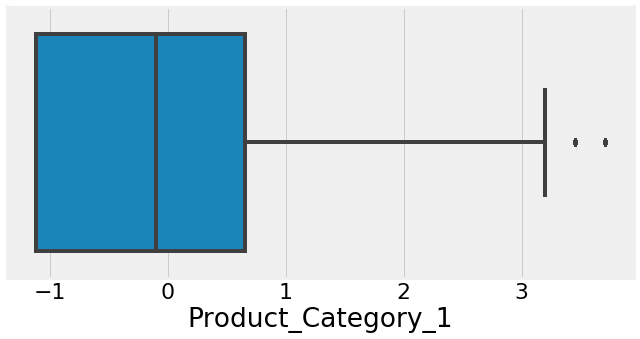

In [30]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 22})
sns.boxplot("Product_Category_1", hue="Purchase", data=train)

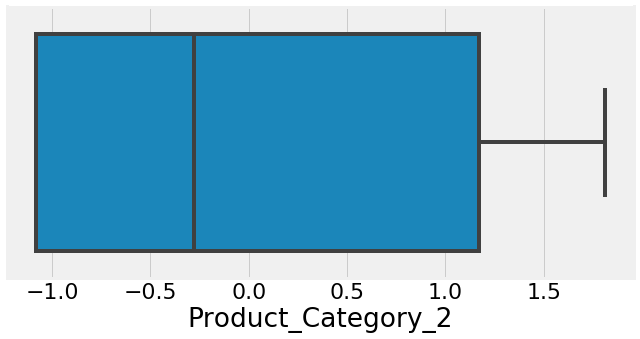

In [31]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 22})
sns.boxplot("Product_Category_2", hue="Purchase", data=train)

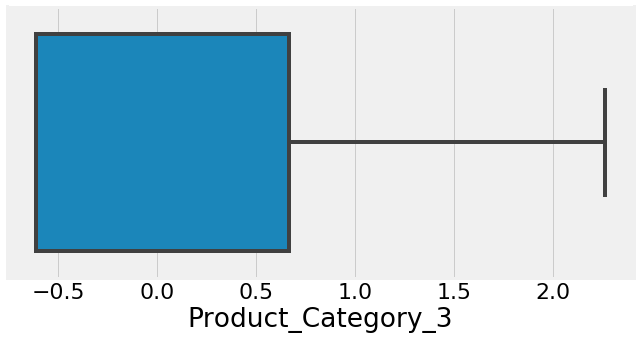

In [32]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 22})
sns.boxplot("Product_Category_3", hue="Purchase", data=train)

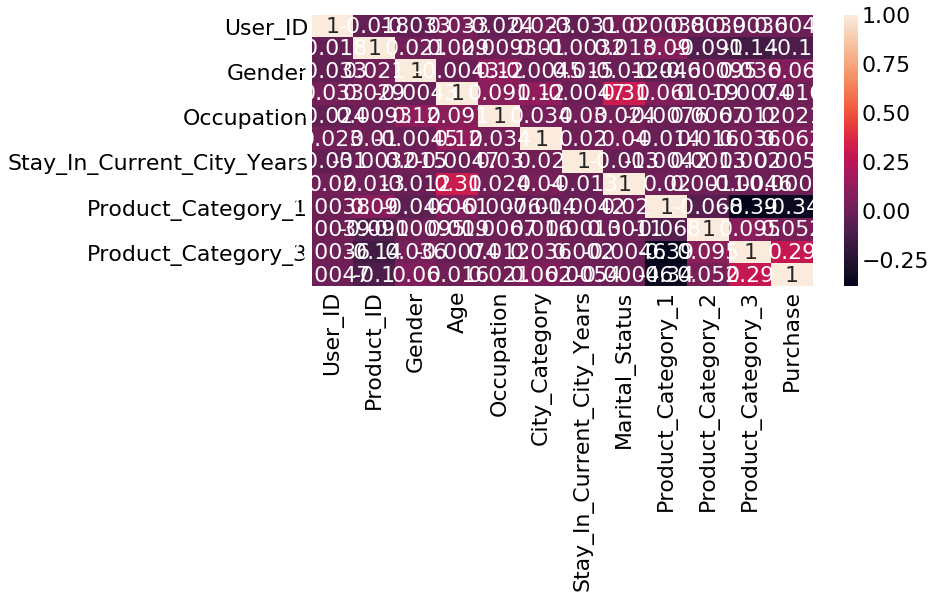

In [33]:
correlation_matrix = train.corr() 
sns.heatmap(correlation_matrix, annot=True) 
plt.show()

In [34]:
X = train.drop(['Purchase'], axis=1)
y = train[['Purchase']]
X_test = test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [35]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_pred, y_val))

print (xgb_reg, rmse)

[13:17:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=1.0, max_delta_step=0,
       max_depth=6, min_child_weight=40, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
       subsample=1, verbosity=1) 2591.851957367946


In [48]:
test1 = pd.read_csv(r'C:\Users\acer\Desktop\Bigdatasales\test.csv')
submission = pd.read_csv(r'C:\Users\acer\Desktop\Bigdatasales\sample_submission_LMg97w5.csv')

In [49]:
submission = submission.drop(["Comb", "Purchase"], axis=1)

In [50]:
submission['Comb'] = test1['User_ID'].astype(str) + test1['Product_ID'].astype(str)

In [52]:
xgb_reg.fit(X, y)
predict = xgb_reg.predict(X_test)

submission['Purchase'] = predict
submission.to_csv(r'C:\Users\acer\Desktop\Bigdatasales\sample_submission_xgb.csv', index=False)

[13:53:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [54]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.layers import Dense, Flatten, Activation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [55]:
NN_model = Sequential() #

In [56]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu')) # The Hidden Layers : 
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu')) 
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu')) 
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer : 
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile the network : 
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error']) 
NN_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,401
Trainable params: 166,401
Non-trainable params: 0
_________________________________________________________________


In [57]:
checkpoint_name = 'Weights12-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto') 
callbacks_list = [checkpoint]

In [58]:
NN_model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split = 0.2, callbacks=callbacks_list)

Train on 352043 samples, validate on 88011 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
351990/352043 [============================>.] - ETA: 0s - loss: 3560.3342 - mean_absolute_error: 3560.3083
Epoch 00001: val_loss improved from inf to 3745.49291, saving model to Weights12-001--3745.49291.hdf5
352043/352043 [==============================] - 161s 458us/sample - loss: 3560.3615 - mean_absolute_error: 3560.3357 - val_loss: 3745.4929 - val_mean_absolute_error: 3745.4905
Epoch 2/50
352035/352043 [============================>.] - ETA: 0s - loss: 3179.0711 - mean_absolute_error: 3179.0544
Epoch 00002: val_loss improved from 3745.49291 to 3092.25770, saving model to Weights12-002--3092.25770.hdf5
352043/352043 [==============================] - 170s 483us/sample - loss: 3179.0949 - mean_absolute_error: 3179.0781 - val_loss: 3092.2577 - val_mean_absolute_error: 3092.2698
Epoch 3/50
351935/352043 [============================>.] - ETA: 0s - loss: 3152.6030 - mean_absol

Epoch 23/50
352025/352043 [============================>.] - ETA: 0s - loss: 2960.8342 - mean_absolute_error: 2960.8340
Epoch 00023: val_loss did not improve from 2895.87433
352043/352043 [==============================] - 146s 416us/sample - loss: 2960.8689 - mean_absolute_error: 2960.8684 - val_loss: 2915.5040 - val_mean_absolute_error: 2915.4993
Epoch 24/50
352040/352043 [============================>.] - ETA: 0s - loss: 2956.3178 - mean_absolute_error: 2956.2983
Epoch 00024: val_loss improved from 2895.87433 to 2885.67039, saving model to Weights12-024--2885.67039.hdf5
352043/352043 [==============================] - 143s 406us/sample - loss: 2956.3002 - mean_absolute_error: 2956.2808 - val_loss: 2885.6704 - val_mean_absolute_error: 2885.6660
Epoch 25/50
351970/352043 [============================>.] - ETA: 0s - loss: 2963.6903 - mean_absolute_error: 2963.6895
Epoch 00025: val_loss improved from 2885.67039 to 2877.57661, saving model to Weights12-025--2877.57661.hdf5
352043/352043 

In [60]:
weights_file = 'Weights12-037--2360.07178.hdf5' 
# choose the best checkpoint 
NN_model.load_weights(weights_file) 
# load it 
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [74]:
predictions5 = NN_model.predict(X_val)

In [75]:
nn_pred= np.round(predictions5) 
rmse = np.sqrt(mean_squared_error(nn_pred,y_val)) 
print("RMSE: %f" % (rmse)) 
print("Mean absolute error: %f" %(mean_absolute_error(y_val, nn_pred)))

RMSE: 3380.154839
Mean absolute error: 2373.744251


In [76]:
submission1 = pd.read_csv(r'C:\Users\acer\Desktop\Bigdatasales\sample_submission_LMg97w5.csv')

In [77]:
submission1 = submission1.drop(["Comb", "Purchase"], axis=1)

In [78]:
submission1['Comb'] = test1['User_ID'].astype(str) + test1['Product_ID'].astype(str)

In [79]:
submission1.shape


(233599, 1)

In [82]:
predictions5.shape

(110014, 1)

In [81]:
submission1['Purchase'] = predictions5
submission1.to_csv(r'C:\Users\acer\Desktop\Bigdatasales\sample_submission_NN.csv', index=False)

ValueError: Length of values does not match length of index

In [ ]:
submission